In [1]:
#Resposta questão 1.1
##Versão Python 3.9.20
import sys
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns



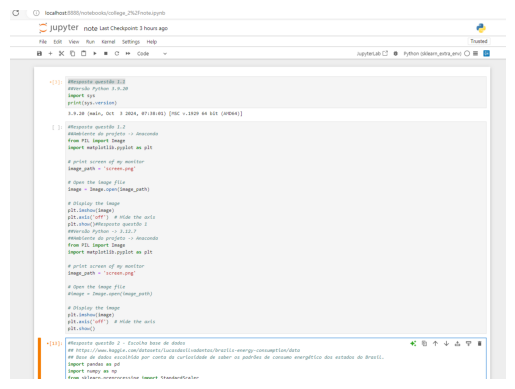

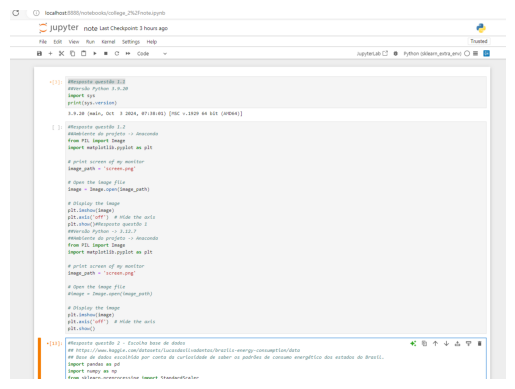

In [2]:
#Resposta questão 1.2
##Ambiente do projeto -> Anaconda
from PIL import Image
import matplotlib.pyplot as plt

# print screen of my monitor
image_path = 'screen.png'

# Open the image file
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()#Resposta questão 1
##Versão Python -> 3.12.7
##Ambiente do projeto -> Anaconda
from PIL import Image
import matplotlib.pyplot as plt

# print screen of my monitor
image_path = 'screen.png'

# Open the image file
#image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()

In [3]:
#Resposta questão 2 - Escolha base de dados
## https://www.kaggle.com/datasets/lucasdasilvadantas/brazils-energy-consumption/data
## Base de dados escolhida por conta da curiosidade de saber se é possível criar grupos que ajudem a 
## compreender a dinâmica regional do consumo elétrico os padrões de consumo energético dos estados do Brasil.

file_path = 'data\\brazil_data.xlsx'


df = pd.read_excel(file_path)

# Display the first few rows of the dataframe
display(df)

,Data,TipoConsumidor,Sistema,UF,Setor Econômico - N1,Setor Econômico - N2,Setor Econômico - N3,Tipo Tensão - N1,Tipo Tensão - N2,Tipo Tensão - N3,Faixa de Consumo N1,Faixa de Consumo N2,Consumidores,Consumo
0,20140101,Cativo,Sudeste / Centro-Oeste,RO,Residencial,Convencional (Excepto Baixa Renda),TOTAL,A - Alta Tensão,TOTAL,TOTAL,Alta Tensão,Alta Tensão,1.0,8.0
1,20140201,Cativo,Sudeste / Centro-Oeste,RO,Residencial,Convencional (Excepto Baixa Renda),TOTAL,A - Alta Tensão,TOTAL,TOTAL,Alta Tensão,Alta Tensão,1.0,8.0
2,20140301,Cativo,Sudeste / Centro-Oeste,RO,Residencial,Convencional (Excepto Baixa Renda),TOTAL,A - Alta Tensão,TOTAL,TOTAL,Alta Tensão,Alta Tensão,1.0,9.0
3,20140401,Cativo,Sudeste / Centro-Oeste,RO,Residencial,Convencional (Excepto Baixa Renda),TOTAL,A - Alta Tensão,TOTAL,TOTAL,Alta Tensão,Alta Tensão,1.0,10.0
4,20140501,Cativo,Sudeste / Centro-Oeste,RO,Residencial,Convencional (Excepto Baixa Renda),TOTAL,A - Alta Tensão,TOTAL,TOTAL,Alta Tensão,Alta Tensão,1.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285494,20210801,Cativo,Sudeste / Centro-Oeste,DF,Consumo Próprio,Outras Atividades,TOTAL,A - Alta Tensão,"A-4 - 2,3 a 25 kV",TOTAL,Não Aplicável,Não Aplicável,1.0,NaN
285495,20210901,Cativo,Sudeste / Centro-Oeste,DF,Consumo Próprio,Outras Atividades,TOTAL,A - Alta Tensão,"A-4 - 2,3 a 25 kV",TOTAL,Não Aplicável,Não Aplicável,1.0,NaN
285496,20211001,Cativo,Sudeste / Centro-Oeste,DF,Consumo Próprio,Outras Atividades,TOTAL,A - Alta Tensão,"A-4 - 2,3 a 25 kV",TOTAL,Não Aplicável,Não Aplicável,1.0,NaN
285497,20211101,Cativo,Sudeste / Centro-Oeste,DF,Consumo Próprio,Outras Atividades,TOTAL,A - Alta Tensão,"A-4 - 2,3 a 25 kV",TOTAL,Não Aplicável,Não Aplicável,1.0,NaN


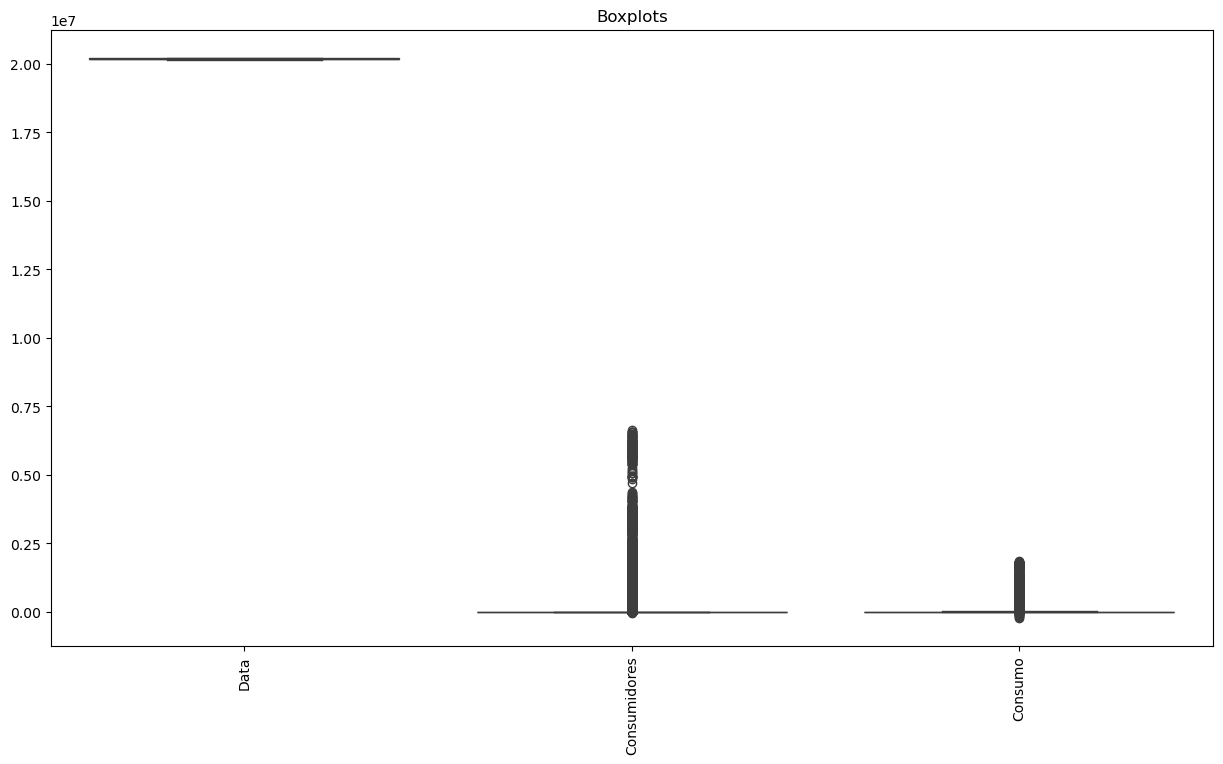

In [4]:
#Resposta questão 2 - Faixa de valores e o que deve ser feito
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplots")
plt.show()



In [5]:
## Com base nos gráficos. Vai ser necessário tratar o null, utilizar a UF como label. Retirar o campos texto que não serão utilizados por não ser relevante
## para o objetivo. 
## também será necessário substituir a vírgula por ponto para então normalizar



In [6]:
# Ajustando nulo e valores negativos
df['Consumidores'].fillna(0)

# Ajustando nulo e valores negativos
df['Consumo'].fillna(0)

# Remove valores negativos
df = df[(df['Consumidores'] >= 0) & (df['Consumo'] >= 0)]

# Convertendo a coluna 'Consumo' de string para float (substituindo vírgula por ponto)
df['Consumo'] = df['Consumo'].astype(str).str.replace(",", ".").astype(float)

# Criando variáveis dummy para 'TipoConsumidor' e 'Sistema'
df_agg = pd.get_dummies(df, columns=['TipoConsumidor', 'Sistema'])

# Removendo colunas que não serão usadas no cluster (por exemplo, 'UF' e 'Data')
df_agg = df_agg.drop([ 'UF', 'Data','Setor Econômico - N1','Setor Econômico - N2',
                      'Setor Econômico - N3','Tipo Tensão - N1','Tipo Tensão - N2',
                      'Tipo Tensão - N3','Faixa de Consumo N1','Faixa de Consumo N2'], axis=1)
print(df_agg.dtypes)


display(df_agg.head())

Consumidores                      float64
Consumo                           float64
TipoConsumidor_Cativo                bool
TipoConsumidor_Livre                 bool
Sistema_Nordeste                     bool
Sistema_Norte Interligado            bool
Sistema_Sistemas Isolados            bool
Sistema_Sudeste / Centro-Oeste       bool
Sistema_Sul                          bool
dtype: object


,Consumidores,Consumo,TipoConsumidor_Cativo,TipoConsumidor_Livre,Sistema_Nordeste,Sistema_Norte Interligado,Sistema_Sistemas Isolados,Sistema_Sudeste / Centro-Oeste,Sistema_Sul
0,1.0,8.0,True,False,False,False,False,True,False
1,1.0,8.0,True,False,False,False,False,True,False
2,1.0,9.0,True,False,False,False,False,True,False
3,1.0,10.0,True,False,False,False,False,True,False
4,1.0,9.0,True,False,False,False,False,True,False


In [7]:
display(df_agg.head())
# 2. Normalizar as variáveis
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_agg)
display(X_scaled)


,Consumidores,Consumo,TipoConsumidor_Cativo,TipoConsumidor_Livre,Sistema_Nordeste,Sistema_Norte Interligado,Sistema_Sistemas Isolados,Sistema_Sudeste / Centro-Oeste,Sistema_Sul
0,1.0,8.0,True,False,False,False,False,True,False
1,1.0,8.0,True,False,False,False,False,True,False
2,1.0,9.0,True,False,False,False,False,True,False
3,1.0,10.0,True,False,False,False,False,True,False
4,1.0,9.0,True,False,False,False,False,True,False


array([[-0.17504771, -0.23544552,  0.35674255, ..., -0.36952379,
         1.36173118, -0.39040009],
       [-0.17504771, -0.23544552,  0.35674255, ..., -0.36952379,
         1.36173118, -0.39040009],
       [-0.17504771, -0.23543231,  0.35674255, ..., -0.36952379,
         1.36173118, -0.39040009],
       ...,
       [-0.17504771, -0.23532659,  0.35674255, ..., -0.36952379,
         1.36173118, -0.39040009],
       [-0.17504299, -0.23548516,  0.35674255, ..., -0.36952379,
         1.36173118, -0.39040009],
       [-0.17504299, -0.23536623,  0.35674255, ..., -0.36952379,
         1.36173118, -0.39040009]])

In [26]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
# 3. Encontrar o número ótimo de clusters para K-Médias usando índice de silhueta
range_n_clusters = range(2, 18, 5)  # Testar de 2 até 10 clusters, por exemplo
best_k = None
best_silhouette = -1
silhouette_scores = []
db_silhouette_scores = []
ch_silhouette_scores = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    ch = calinski_harabasz_score(X_scaled, cluster_labels)
    db = davies_bouldin_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    db_silhouette_scores.append(db)
    ch_silhouette_scores.append(ch)






C:\Users\paulo.rogerio\AppData\Local\anaconda3\envs\sklearn_extra_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\paulo.rogerio\AppData\Local\anaconda3\envs\sklearn_extra_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\paulo.rogerio\AppData\Local\anaconda3\envs\sklearn_extra_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\paulo.rogerio\AppData\Local\anaconda3\envs\sklearn_extra_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `

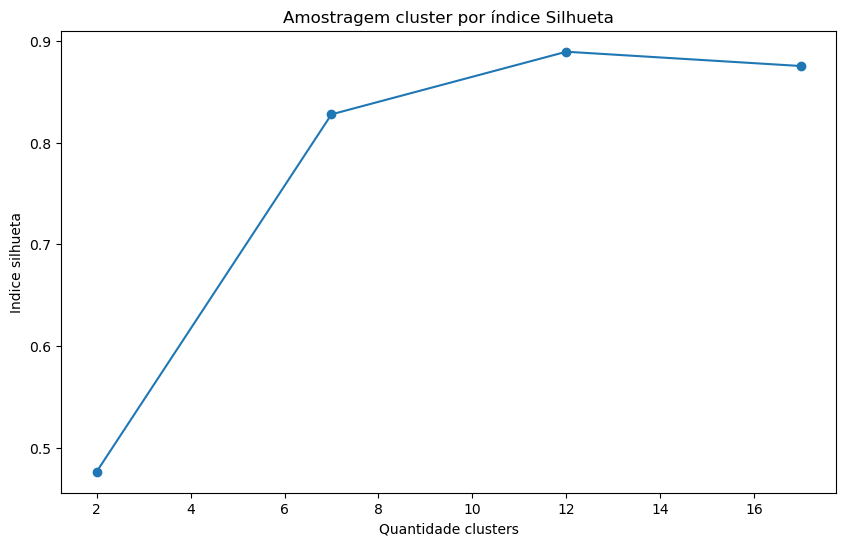

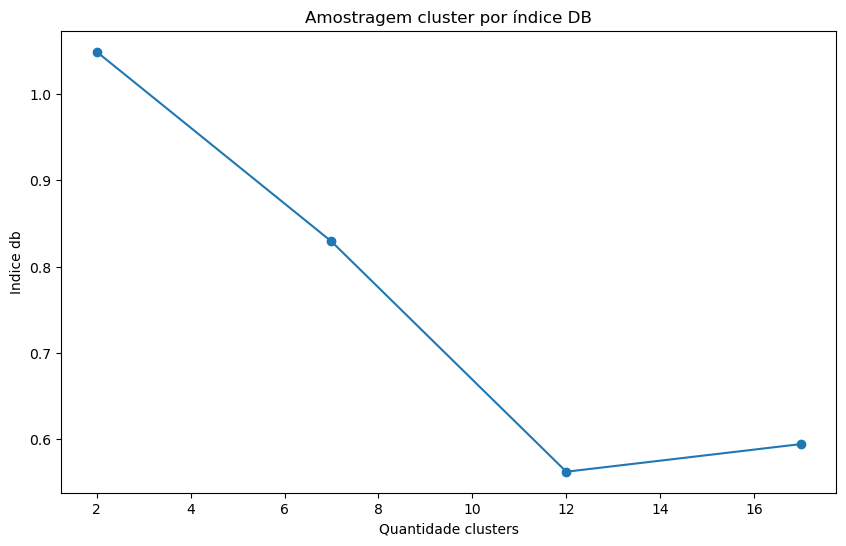

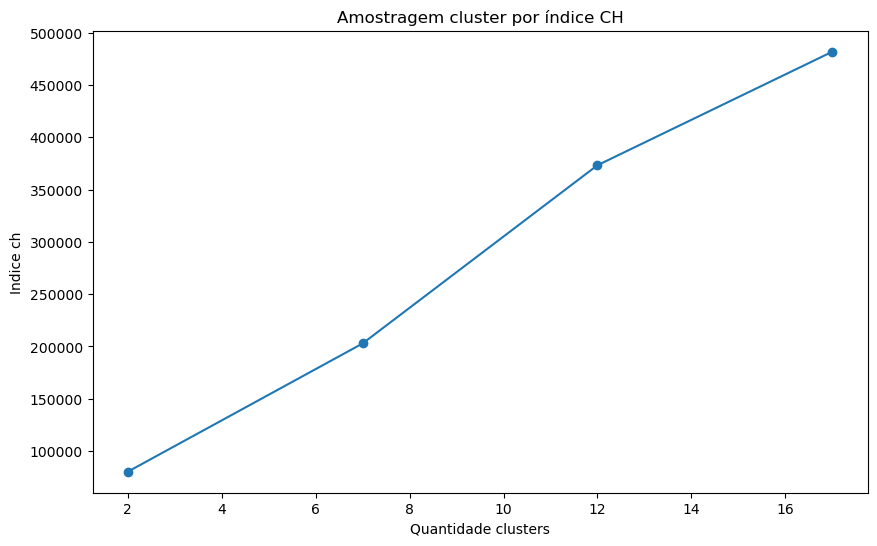

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel("Quantidade clusters")
plt.ylabel("Indice silhueta")
plt.title("Amostragem cluster por índice Silhueta")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(range_n_clusters, db_silhouette_scores, marker='o')
plt.xlabel("Quantidade clusters")
plt.ylabel("Indice db")
plt.title("Amostragem cluster por índice DB")
plt.show()

plt.figure(figsize=(10,6))
plt.plot(range_n_clusters, ch_silhouette_scores, marker='o')
plt.xlabel("Quantidade clusters")
plt.ylabel("Indice ch")
plt.title("Amostragem cluster por índice CH")
plt.show()
           

In [30]:
## Resposta questão Clusterização 3.2 descrição do processo de mensuração Kmeans
### Foi testado várias combinações de clusterização e com base no score da sihueta foi gerado o gráfico acima
### Como pode se ver nesse caso o melhor número de cluster para os dados é 12 pois teve o maior score
### O índice da silhueta é uma medida que utiliza propriedades intra cluster. É cálculado com base da distância média entre um cluster
### e as amostras e também de cluster a outro cluster

## Resposta questão Clusterização 3.4 análise de medidas
#### Pelos gráficos acima percebe-se resultado semelhante nos indices. A exceção é para o índice Calinski Ch que apontou um resultado melhor pra 
#### mais de 12 clusters
#### Silhueta: Quanto mais perto de 1, melhor.
#### Calinski-Harabasz (CH): Quanto maior o valor, melhor.
#### Davies-Bouldin (DB): Quanto menor o valor, melhor.

In [37]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import joblib
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# 4. Ajustar parâmetros do DBSCAN e avaliar silhueta
# DBSCAN não tem número fixo de clusters, mas podemos variar eps e min_samples
eps_values = [0.1, 0.4, 0.6, 0.8, 1.0]  # Ajuste esses valores conforme seus dados
min_samples_values = [1,3,4,5,10,12]     # Ajuste também
dbscan_silhouette_scores = []
db_silhouette_scores = []
ch_silhouette_scores = []
best_dbscan_silhouette = -1
best_params = (None, None)

import numpy as np


X_scaled_subsample = X_scaled


for eps in eps_values:
    for min_s in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_s)
        labels = dbscan.fit_predict(X_scaled_subsample)     
        sil = silhouette_score(X_scaled_subsample, labels)
        ch = calinski_harabasz_score(X_scaled_subsample, labels)
        db = davies_bouldin_score(X_scaled_subsample, labels)
        dbscan_silhouette_scores.append((eps, min_s, sil))
        db_silhouette_scores.append((eps, min_s, db))
        ch_silhouette_scores.append((eps, min_s, ch))
        



            


In [38]:
# Converter a lista de tuplas em um DataFrame
scores_df = pd.DataFrame(dbscan_silhouette_scores, columns=['eps', 'min_samples', 'silhouette'])
db_scores_df = pd.DataFrame(db_silhouette_scores, columns=['eps', 'min_samples', 'silhouette'])
ch_scores_df = pd.DataFrame(ch_silhouette_scores, columns=['eps', 'min_samples', 'silhouette'])



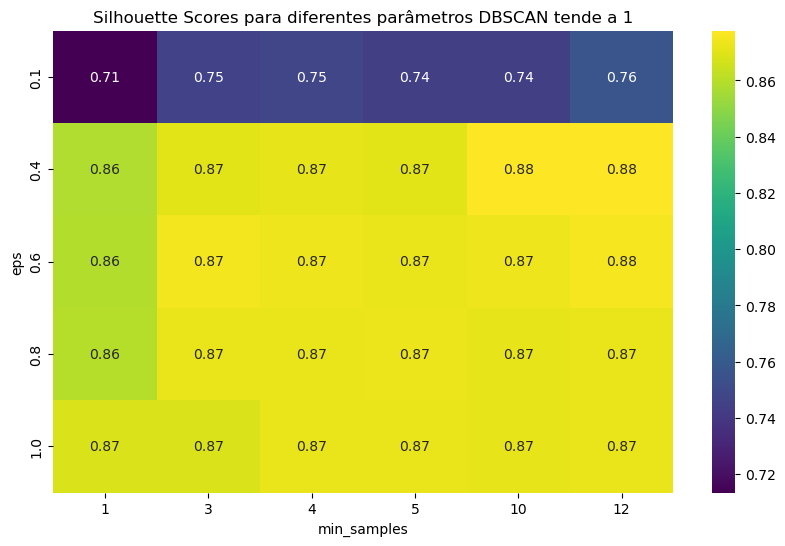

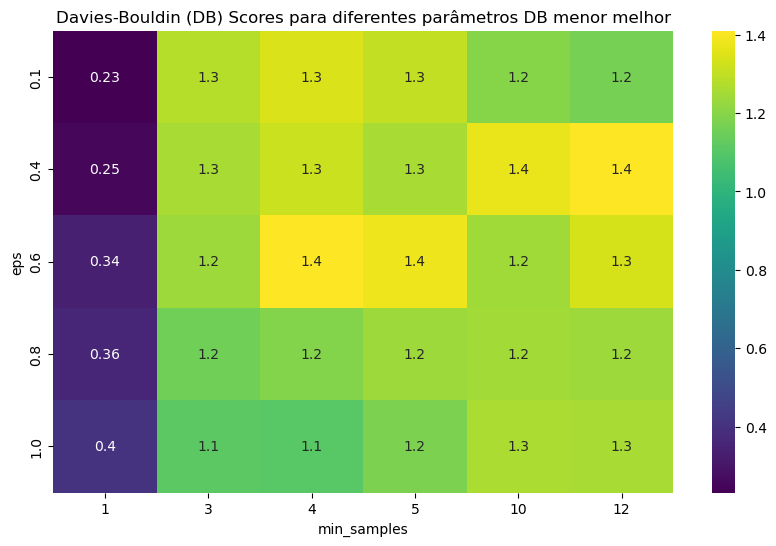

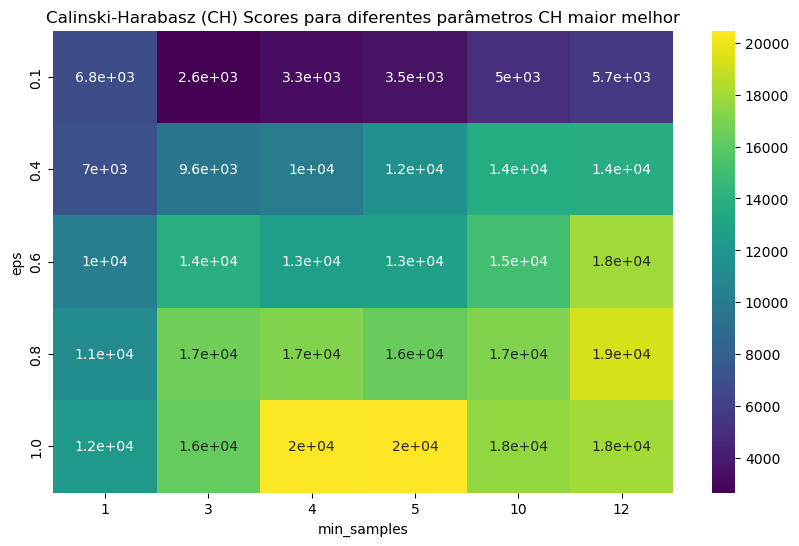

In [40]:


# Criar uma tabela pivô, com eps como índice, min_samples como colunas e a silhueta como valores
scores_pivot = scores_df.pivot(index='eps', columns='min_samples', values='silhouette')
db_scores_pivot = db_scores_df.pivot(index='eps', columns='min_samples', values='silhouette')
ch_scores_pivot = ch_scores_df.pivot(index='eps', columns='min_samples', values='silhouette')

plt.figure(figsize=(10, 6))
sns.heatmap(scores_pivot, annot=True, cmap='viridis')
plt.title("Silhouette Scores para diferentes parâmetros DBSCAN tende a 1")
plt.xlabel("min_samples")
plt.ylabel("eps")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(db_scores_pivot, annot=True, cmap='viridis')
plt.title("Davies-Bouldin (DB) Scores para diferentes parâmetros DB menor melhor")
plt.xlabel("min_samples")
plt.ylabel("eps")
plt.show()


plt.figure(figsize=(10, 6))
sns.heatmap(ch_scores_pivot, annot=True, cmap='viridis')
plt.title("Calinski-Harabasz (CH) Scores para diferentes parâmetros CH maior melhor")
plt.xlabel("min_samples")
plt.ylabel("eps")
plt.show()

In [42]:
#clusters dbscan silhuete
dbscan= DBSCAN(eps=0.4, min_samples=10)
labels_scan= dbscan.fit_predict(X_scaled_subsample)
cluster_labels = set(labels_scan) - {-1}
num_clusters=len(cluster_labels)
display(num_clusters)

24

In [46]:
#clusters dbscan DB
dbscan= DBSCAN(eps=1, min_samples=4)
labels_scan= dbscan.fit_predict(X_scaled_subsample)
cluster_labels = set(labels_scan) - {-1}
num_clusters=len(cluster_labels)
display(num_clusters)

25

In [45]:
#clusters dbscan CH
dbscan= DBSCAN(eps=1, min_samples=4)
labels_scan= dbscan.fit_predict(X_scaled_subsample)
cluster_labels = set(labels_scan) - {-1}
num_clusters=len(cluster_labels)
display(num_clusters)

24

In [ ]:
## Resposta questão Clusterização 3.2 - descrição do processo de mensuração DBScan
### Foi testado várias combinações de clusterização e com base no score da sihueta foi gerado o gráfico acima
### Como pode se ver nesse caso o melhor número de cluster para os dados é 12 pois teve o maior score
### O índice da silhueta no caso do DBscan ajuda a idêntificar a melhor combinação de parâmetros
### Com um epsilon de 0.4 e com o número de samples de 10 produz o melhor resultado

In [ ]:
## Resposta questão Clusterização 3.3 semelhanças e diferenças nos resultados
### Ambos os métodos são úteis para validar clusters. O Dbscan tende a validar uma clusterização com menor ruído 
### e também performar melhor em bases cujo o formato não seja esférico, porém o custo de processamento é maior
### Verifica-se que a clusterização do dbscan eps=0.4, min_samples=10 encontrou 24 clusters indicando um formato não esférico

In [41]:
## Resposta questão Clusterização 3.4 Escolha duas medidas de validação para comparar com o índice da silhueta
### Medidas escolhidas índice de Davies Boldinm e Calinski-Harabasz conforme demonstrado nos plotes acima


In [ ]:
## Resposta questão Clusterização 3.5 Silhueta é um indíce indicado para o DBScan
### Não exatamente. A silhueta é uma métrica útil para avaliar a qualidade da separação dos clusters, 
### porém o DBSCAN não determina explicitamente um número de clusters a priori; ele os revela com base nos 
### parâmetros de densidade (eps e min_samples). Todos os indíces testados retornaram valores semelhantes porém o número de cluster
### totalmente diferente do kmeans

In [47]:
## Resposta questão 4.1 Medidas de similaridade
### Coleta e Pré-Processamento dos Dados, Cálculo da Similaridade, Construção da Matriz de Distâncias ou Similaridade, 
### Clusterização

In [ ]:
## Resposta questão 4.2 Algorítimo de clusterização
### Utilizaria a clusterização hierarquica, pois não exige especificar vetor de características padronizados, já que a similaridade será baseada
### na correlação cruzada.

In [ ]:
## Resposta questão 4.3 Caso de uso
### Predição financeira e investimentos. Agrupar ativos, ações ou indíces que tendem a se comportar de forma semelhante com a mesma sazionalidade
### dessa forma poder prever que quando um ativo do grupo sofre uma mudança uma ação pode ser tomada ou justificada em outro ativo.

In [ ]:
## Resposta questão 4.4 Sugestão de estratégira para medir similaridade entre séries temporais
### DTW Dynamic Time Warping
### Pré-Processamento dos Dados, Cálculo da distância DTW, Construção da Matriz de Distâncias ou Similaridade, 
### Clusterização
### A principal diferença é na etapa de cálculo da distância, onde é feito uma correspondência entre pontos das duas séries, permitindo 
### compensar distorções no tempo.

In [48]:
!pip freeze > requirements.txt